# Analysis of Movie Box Office

### Introduction
The entertainment choices for modern individuals are incredibly diverse, with the advancement of technology and audio-visual capabilities making movie-watching a prevalent leisure activity. Therefore, we aim to conduct research on the movie industry to identify factors influencing box office performance. By understanding these factors, we believe we can provide valuable insights to enhance the movie industry's strategies for boosting box office revenue. Additionally, we intend to use the numerical values associated with these factors to predict the potential box office income of future movies using machine learning techniques.

For our research, we selected a sample of movies and collected relevant information about them, including their runtime, IMDb ratings, budgets, and the number of other movies released in the same week. 

We will be mainly using [numpy](https://numpy.org/), [pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/), [matplotlib](https://matplotlib.org/) and [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) to work with this data.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
%matplotlib notebook

### Step 1: Random Sample Selection
We will download box office information from 2016 to 2023 on the website: https://www.boxofficemojo.com/year/world/?ref_=bo_nb_ydw_tab, which includes the names and total earnings of the top 200 movies each year. Initially, we will plot a bar chart using matplotlib to visualize the box office earnings for the top 200 movies over the past eight years. Subsequently, we randomly selected 35 movies from this dataset for further analysis using [random](https://www.geeksforgeeks.org/python-random-function/).

In [3]:
ii = 2016
d = {}
dfyear_list = []
movie_name_2016_to_2023 = []

for i in range(2016,2024):
    dfyear_list.append('df_'+str(i))

for i in dfyear_list:
    d[i] = pd.DataFrame()
    url = 'https://www.boxofficemojo.com/year/world/'+str(ii)+'/'
    d[i] = pd.read_html(url)[0]
    x = [float(j.replace(',', '').replace('$', ''))/1000000 for j in d[i]['Worldwide']]
    movie_name = [j for j in d[i]['Release Group']]
    movie_name_2016_to_2023 = movie_name_2016_to_2023 + movie_name
    d[i]['BOXOFFICE (million)'] = x
    ii += 1

<IPython.core.display.Javascript object>


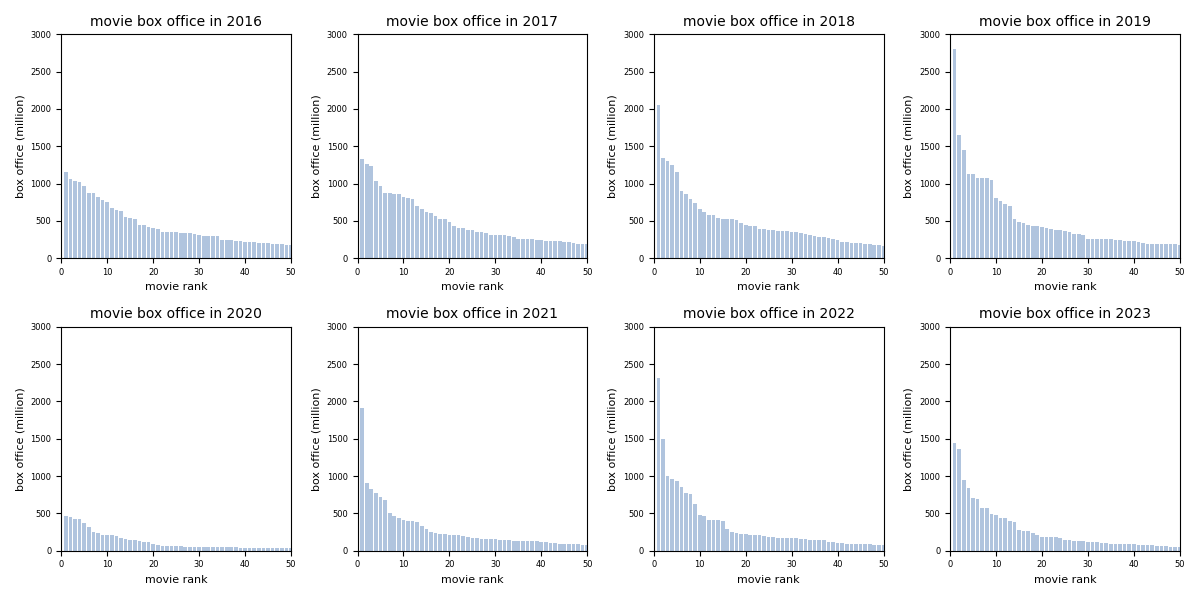

In [6]:
# Draw 8 figures to present different box office from 2016 to 2023
x1 = [float(i) for i in d['df_2016']['Rank'][0:50]]
y1 = [round(i, 3) for i in d['df_2016']['BOXOFFICE (million)'][0:50]]

x2 = [float(i) for i in d['df_2017']['Rank'][0:50]]
y2 = [round(i, 3) for i in d['df_2017']['BOXOFFICE (million)'][0:50]]

x3 = [float(i) for i in d['df_2018']['Rank'][0:50]]
y3 = [round(i, 3) for i in d['df_2018']['BOXOFFICE (million)'][0:50]]

x4 = [float(i) for i in d['df_2019']['Rank'][0:50]]
y4 = [round(i, 3) for i in d['df_2019']['BOXOFFICE (million)'][0:50]]

x5 = [float(i) for i in d['df_2020']['Rank'][0:50]]
y5 = [round(i, 3) for i in d['df_2020']['BOXOFFICE (million)'][0:50]]

x6 = [float(i) for i in d['df_2021']['Rank'][0:50]]
y6 = [round(i, 3) for i in d['df_2021']['BOXOFFICE (million)'][0:50]]

x7 = [float(i) for i in d['df_2022']['Rank'][0:50]]
y7 = [round(i, 3) for i in d['df_2022']['BOXOFFICE (million)'][0:50]]

x8 = [float(i) for i in d['df_2023']['Rank'][0:50]]
y8 = [round(i, 3) for i in d['df_2023']['BOXOFFICE (million)'][0:50]]

fig00, axes00 = plt.subplots(2, 4, figsize=(12, 6))

data = [(x1, y1), (x2, y2), (x3, y3), (x4, y4), (x5, y5), (x6, y6), (x7, y7), (x8, y8)]

for i, (x, y) in enumerate(data):
    row = i // 4
    col = i % 4
    ax = axes00[row, col]
    ax.bar(x, y, color = 'lightsteelblue')
    ax.set_xlabel('movie rank', fontsize = 8)
    ax.set_ylabel('box office (million)', fontsize = 8)
    ax.tick_params(axis = 'both', labelsize = 6)
    ax.set_title(f'movie box office in {i+2016}', fontsize = 10)
    ax.set_ylim(0, 3000)
    ax.set_xlim(0, 50)

plt.tight_layout()

plt.show()

The above bar chart illustrates a significant drop in box office numbers in 2020 due to the impact of the COVID-19 pandemic. Among the eight years, the highest-grossing film was "Avengers: Endgame" in 2019.

In [ ]:
# choose sample randomly
random.sample(movie_name_2016_to_2023, 35)

### Step 2: Analysis of Box Office Influencing Factors
In the beginning, we extracted the names of the 35 selected movies and collected relevant data for each sample. This information was organized into a CSV file for further analysis. We ensured that the samples were evenly distributed across different years, as indicated by the following bar chart.

In [13]:
df1 = pd.read_csv('data.csv')

<IPython.core.display.Javascript object>


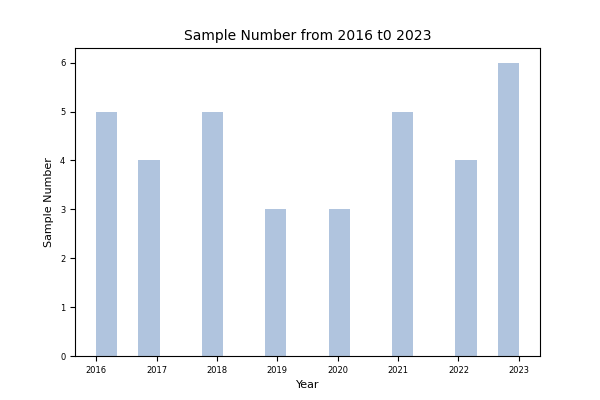

Text(0.5, 1.0, 'Sample Number from 2016 t0 2023')

In [14]:
fig0, ax0 = plt.subplots(figsize =(6, 4))
ax0.hist(df1['Release Year'][1:36], bins = 20, color = 'lightsteelblue')
ax0.set_xlabel('Year', fontsize = 8)
ax0.set_ylabel('Sample Number', fontsize = 8)
ax0.tick_params(axis = 'both', labelsize = 6)
ax0.set_title('Sample Number from 2016 t0 2023', fontsize = 10)

Next, we conducted analyses on various factors affecting box office performance, including runtime, IMDb ratings, budgets, and the number of other movies released in the same week. Linear regression was employed to identify the relationships between these factors and box office performance. Additionally, correlation coefficients were calculated for each factor's relationship with box office performance.

#### Runtime

<IPython.core.display.Javascript object>


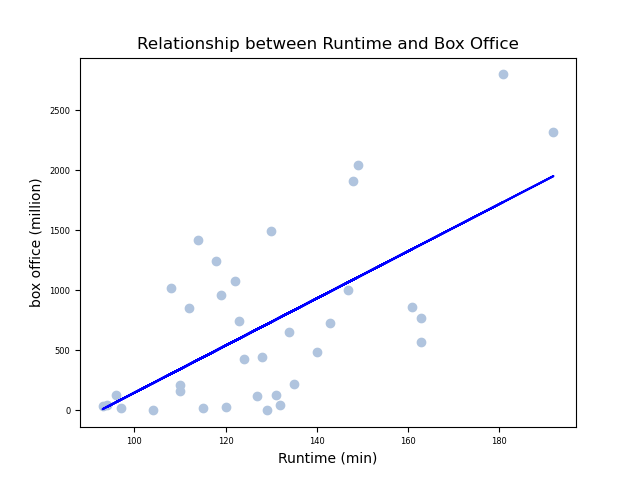

Text(0.5, 1.0, 'Relationship between Runtime and Box Office')

In [15]:
fig1b, ax1b = plt.subplots()
y1 = [float(i.replace(',', '').replace('$',''))/1000000 for i in df1['Box Office'][1:36]]
x1 = [float(i.replace(',', '')) for i in df1['Runtime (min)'][1:36]]

model1 = LinearRegression()
model1.fit(np.array(x1).reshape(-1, 1), y1)

ax1b.scatter(x1, y1, color = 'lightsteelblue')
ax1b.plot(x1, model1.predict(np.array(x1).reshape(-1, 1)), color = 'blue')
ax1b.set_xlabel('Runtime (min)', fontsize = 10)
ax1b.set_ylabel('box office (million)', fontsize = 10)
ax1b.tick_params(axis = 'both', labelsize = 6)
ax1b.set_title('Relationship between Runtime and Box Office')

#### IMDb ratings

<IPython.core.display.Javascript object>


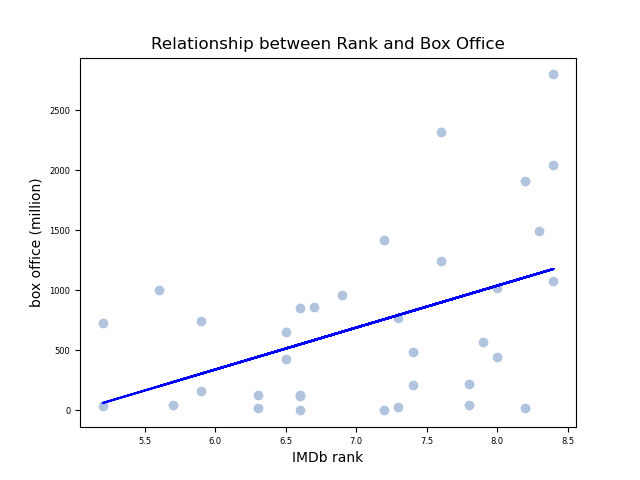

Text(0.5, 1.0, 'Relationship between Rank and Box Office')

In [16]:
fig2b, ax2b = plt.subplots()
y2 = [float(i.replace(',', '').replace('$',''))/1000000 for i in df1['Box Office'][1:36]]
x2 = [float(i) for i in df1['Avarage Rank (IMDb rank?)'][1:36]]

model2 = LinearRegression()
model2.fit(np.array(x2).reshape(-1, 1), y2)

ax2b.plot(x2, model2.predict(np.array(x2).reshape(-1, 1)), color = 'blue')
ax2b.scatter(x2, y2, color = 'lightsteelblue')
ax2b.set_xlabel('IMDb rank', fontsize = 10)
ax2b.set_ylabel('box office (million)', fontsize = 10)
ax2b.tick_params(axis = 'both', labelsize = 6)
ax2b.set_title('Relationship between Rank and Box Office')

#### Budgets

<IPython.core.display.Javascript object>


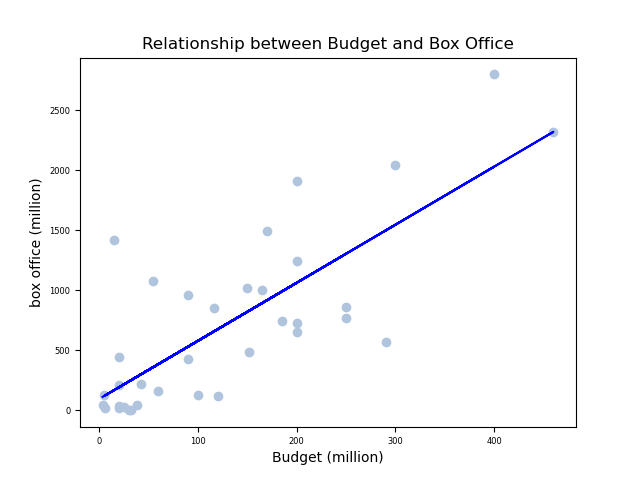

Text(0.5, 1.0, 'Relationship between Budget and Box Office')

In [17]:
fig3b, ax3b = plt.subplots()
y3 = [float(i.replace(',', '').replace('$',''))/1000000 for i in df1['Box Office'][1:36]]
x3 = [float(i.replace(',', '').replace('$', ''))/1000000 for i in df1['Budget'][1:36]]

model3 = LinearRegression()
model3.fit(np.array(x3).reshape(-1, 1), y3)


ax3b.plot(x3, model3.predict(np.array(x3).reshape(-1, 1)), color = 'blue')
ax3b.scatter(x3, y3, color = 'lightsteelblue')
ax3b.set_xlabel('Budget (million)', fontsize = 10)
ax3b.set_ylabel('box office (million)', fontsize = 10)
ax3b.tick_params(axis = 'both', labelsize = 6)
ax3b.set_title('Relationship between Budget and Box Office')

#### Number of other movies released in the same week

<IPython.core.display.Javascript object>


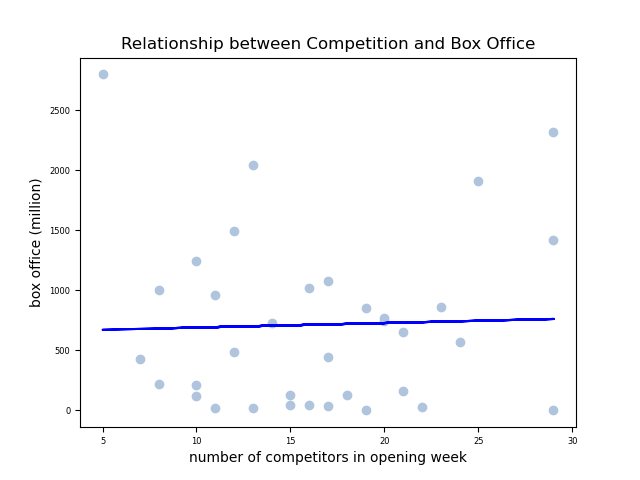

Text(0.5, 1.0, 'Relationship between Competition and Box Office')

In [18]:
fig4b, ax4b = plt.subplots()
y4 = [float(i.replace(',', '').replace('$',''))/1000000 for i in df1['Box Office'][1:36]]
x4 = [float(i) for i in df1['Number of screens in the opening weekend'][1:36]]

model4 = LinearRegression()
model4.fit(np.array(x4).reshape(-1, 1), y4)

ax4b.plot(x4, model4.predict(np.array(x4).reshape(-1, 1)), color = 'blue')
ax4b.scatter(x4, y4, color = 'lightsteelblue')
ax4b.set_xlabel('number of competitors in opening week', fontsize = 10)
ax4b.set_ylabel('box office (million)', fontsize = 10)
ax4b.tick_params(axis = 'both', labelsize = 6)
ax4b.set_title('Relationship between Competition and Box Office')

#### Correlation coefficients 

In [111]:
df_total = pd.DataFrame()

In [112]:
df_total['Name'] = df1['Movie Name'][1:36]
df_total['Box Office'] = y1
df_total['Runtime'] = x1
df_total['Avarage Rank'] = x2
df_total['Budget'] = x3
df_total['Competitor'] = x4
df_total

,Name,Box Office,Runtime,Avarage Rank,Budget,Competitor
1,Barbie,1417.778910,114.0,7.2,15.1,29.0
2,Spider Man- No way home,1912.233593,148.0,8.2,200.0,25.0
3,Dumb Money,0.220947,104.0,7.2,30.0,19.0
4,The Nun II,161.127738,110.0,5.9,60.0,21.0
5,Blue Beetle,120.418050,127.0,6.6,120.0,10.0
6,Top Gun Maverick,1495.696292,130.0,8.3,170.0,12.0
7,Bad Boys for life,426.505244,124.0,6.5,90.0,7.0
8,Avenger Endgame,2799.439100,181.0,8.4,400.0,5.0
9,Mission: Impossible - Dead Reckoning Part One,566.098589,163.0,7.9,290.0,24.0
10,Avatar: The Way of Water,2320.250281,192.0,7.6,460.0,29.0


In [281]:
df_total['Box Office'].corr(df_total['Runtime'])

0.6411981101402126

In [282]:
df_total['Box Office'].corr(df_total['Avarage Rank'])

0.45629226682429574

In [283]:
df_total['Box Office'].corr(df_total['Budget'])

0.7790030985691269

In [284]:
df_total['Box Office'].corr(df_total['Competitor'])

0.03308348247264256

In [285]:
df_total.cov()

/var/folders/yn/9m3hplhn2yl19kgthcj7z46m0000gn/T/ipykernel_21740/1447815378.py:1: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_total.cov()


,Box Office,Runtime,Avarage Rank,Budget,Competitor
Box Office,523887.635759,10981.087615,312.452421,65701.892771,152.594278
Runtime,10981.087615,559.845378,6.712185,2340.087227,17.422689
Avarage Rank,312.452421,6.712185,0.895042,25.319076,-0.207143
Budget,65701.892771,2340.087227,25.319076,13578.107513,58.293613
Competitor,152.594278,17.422689,-0.207143,58.293613,40.608403


Conclusions were drawn based on the correlation coefficients, revealing that budget has the highest impact on box office performance (correlation coefficient: 0.78), indicating a strong positive correlation. This observation aligns with common sense, as a higher budget often allows for the inclusion of popular actors and more elaborate special effects, which can attract a larger audience. Runtime follows with a correlation coefficient of 0.64, showing a moderate positive correlation. IMDb ratings exhibit a correlation coefficient of 0.46, representing a moderate positive correlation. It's important to note that not everyone bases their decision to watch a movie on its IMDb ranking. Personal preferences vary, with some viewers considering this ranking while others do not. The number of other movies released in the same week shows a weak correlation, with a coefficient of only 0.033. This finding makes sense, as a high-quality movie tends to perform well at the box office, even when it faced with competition during its opening week.

### Step 3: Machine Learning for Future Box Office Prediction
With data collected for each movie, we believe it's feasible to construct a machine learning model to predict future box office performance. Due to the insufficient number of samples, the model may not achieve a high score and accuracy. Nevertheless, we did our best to apply machine learning in this real-world case. Once we acquire expertise in data crawling, we will be able to conduct a more precise analysis.

We will be mainly using pandas and [scikit-learn](https://scikit-learn.org/stable/) to work with this data

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

To do machine learning, we have to separate our data into training data and testing data. It can check the model’s performance using mean square error and r square. After separating our data, we will use additional techniques such as cross-validation to tune the best parameters. These steps are taken to prevent overfitting. Later, we will use the R-squared coefficient to select our model. The R-squared coefficient is a statistical metric that assesses how closely regression predictions align with actual data points. 

In our efforts, we will teste Linear Regression, Ridge Regression, and Random Forest models using python. Our findings show that the Ridge regression model is well-suited to our data with its high R-squared score of 74% and the lowest MSE, allowing us to predict potential box office performance when provided with budget, runtime, the number of other movies released in the same week, and IMDb scores.

In [50]:
obj = ['Box Office']
features = ['Runtime', 'Avarage Rank', 'Budget', 'Competitor']

X = df_total[features]
y = df_total[obj]

#### Linear Regression

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

linear_reg = LinearRegression()

# Fit the model to the training data
linear_reg.fit(X_train, y_train)

coefficients = linear_reg.coef_

# Make predictions
y_pred = linear_reg.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 102156.88543351923
R-squared: 0.7429037430505466


#### Random Forest

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define hyperparameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create and configure GridSearchCV
grid_search = GridSearchCV(estimator = RandomForestRegressor(random_state=42),
                           param_grid = param_grid,
                           cv = 5,  # Cross-validation folds
                           scoring = 'r2',  # Use R-squared for scoring
                           n_jobs = -1)  # Use all available CPU cores

# Fit the GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_

# Create the RandomForestRegressor model with the best hyperparameters
rf_model = RandomForestRegressor(random_state=42, **best_params)
rf_model.fit(X_train, y_train)

# Evaluate the model
y_pred = rf_model.predict(X_test)
r2 = r2_score(y_test, y_pred)  # Calculate R2
mse = mean_squared_error(y_test, y_pred)

# feature importances
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)

In [134]:
print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")
print("Feature Importances:")
print(feature_importances)

Mean Squared Error: 148076.6897740789
R-squared Score: 0.6273382599633393
Feature Importances:
Runtime         0.242352
Avarage Rank    0.267021
Budget          0.405856
Competitor      0.084771
dtype: float64


#### Ridge Regression

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ridge_params = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
ridge_grid = GridSearchCV(Ridge(), ridge_params, cv=5)
ridge_grid.fit(X_train, y_train)

ridge_best_model = ridge_grid.best_estimator_
y_pred_ridge = ridge_best_model.predict(X_test)

ridge_mse = mean_squared_error(y_test, y_pred_ridge)
ridge_r2 = r2_score(y_test, y_pred_ridge)
print('Ridge Regression Results:')
print(f'Mean Squared Error: {ridge_mse}')
print(f'R-squared: {ridge_r2}')
print(f'Best Ridge Alpha: {ridge_best_model.alpha}')

Ridge Regression Results:
Mean Squared Error: 101795.6961569586
R-squared: 0.7438127411142597
Best Ridge Alpha: 0.1


#### Prediction
In summary, we can employ this Ridge regression model to make predictions. For instance, if we have a movie with a runtime of 120 minutes, a budget of 100 million, an IMDb score of 7, and we also imagine that there are eight additional movies in the opening week, then we can estimate that this movie's box office will be around 631 million.

In [93]:
test_df = pd.DataFrame({'Runtime':[120], 'Avarage Rank':[7], 'Budget':[100], 'Competitor':[8]})
test_df

,Runtime,Avarage Rank,Budget,Competitor
0,120,7,100,8


In [96]:
yy_pred = ridge_best_model.predict(test_df)
yy_pred

array([[630.74183036]])